<IPython.core.display.Javascript object>


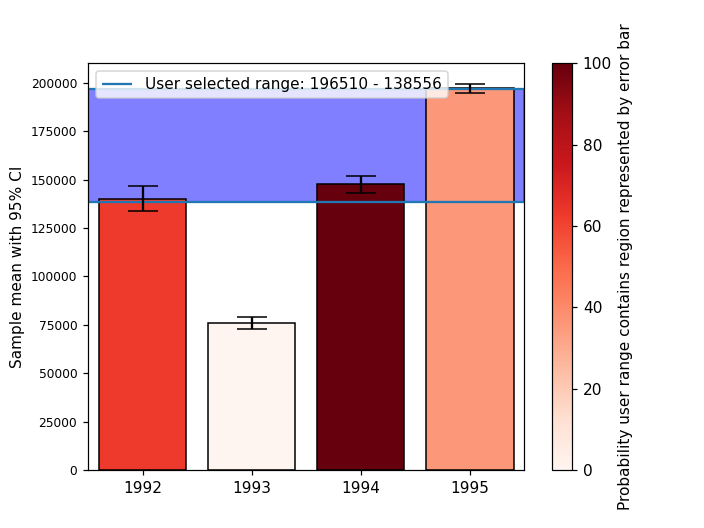

9

In [27]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import matplotlib as mpl
import math
#from mpl_toolkits.axes_grid1 import make_axes_locatable

np.random.seed(1233)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                   index=[1992,1993,1994,1995])

SE = df.sem(axis=1).tolist()

top = 0
bottom = 0

cmap = plt.get_cmap('Reds')
fig, ax1 = plt.subplots()

sm = plt.cm.ScalarMappable(cmap=cmap,norm=mpl.colors.Normalize(vmin=0,vmax=100))
cb = plt.colorbar(sm,ax=ax1,label = "Probability user range contains region represented by error bar")
plt.xlabel("Year")

plt.ylabel("Sample mean with 95% CI")



def color_bars():
    
    for i in range(len(df)):
        global top
        global bottom
        mu = df[i].mean()
        upper = mu + SE[i]*1.96
        lower = mu - SE[i]*1.96
        a = min(top,upper)
        b = max(bottom,lower)
        
        if bottom >= upper:
            shade = 0
        elif top <= lower:
            shade = 0
        else:
            shade = ((a-b)/(upper-lower))
        
        plt.bar(i,mu,color=cmap(shade),edgecolor='black',yerr=SE[i]*1.96,capsize=10)
        plt.xlim((-.5,3.5))
        plt.ylim((0,210000))
        plt.xticks([0,1,2,3],['1992','1993','1994','1995'])
        plt.yticks(fontsize=8)
        plt.ylabel("Sample mean with 95% CI")

        
color_bars()

def on_press(event):
    
    global top
    global bottom
    
    if event.inaxes:
        plt.cla()
        plt.gca()


        if event.button == 1:
            top = math.floor(event.ydata)
            if top < bottom:
                top = bottom
        if event.button == 3:
            bottom = math.floor(event.ydata)
            if bottom > top:
                bottom = top
        
        plt.hlines(top,-.5, 3.5, label = "User selected range: {} - {}".format(top,bottom))
        plt.hlines(bottom,-.5, 3.5)
        plt.fill_between((-.5,3.5),top,bottom,color = [0,0,1,.5])

        plt.legend()
        
        color_bars()

plt.gcf().canvas.mpl_connect('button_press_event',on_press)
